In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Đảm bảo hiển thị đồ thị trong notebook
%matplotlib inline


In [10]:
data = 'income_evaluation.csv'
df = pd.read_csv(data)

# Kiểm tra kích thước của tập dữ liệu
print('The shape of the dataset : ', df.shape)
df.head()


The shape of the dataset :  (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Đặt tên cột
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']
df.columns = col_names

# Thông tin chung về dữ liệu
df.info()
df.describe(include='all')

# Kiểm tra giá trị thiếu
print('Số lượng giá trị thiếu trong mỗi cột:')
print(df.isnull().sum())

# Hàm EDA ban đầu
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Kích thước : %d hàng, %d cột" % (df.shape[0], df.shape[1]))
        print("Tổng số giá trị NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Tên Cột", "Kiểu Dữ Liệu", "#Duy Nhất", "Giá Trị NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Kỳ vọng một DataFrame nhưng nhận được một %15s" % (type(df)))

initial_eda(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Số lượng giá trị thiếu trong mỗi cột:
age               0
workclass         0
fnlwgt         

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_16564\4074258043.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


In [12]:
# Liệt kê các biến phân loại
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Có {} biến phân loại\n'.format(len(categorical)))
print('Các biến phân loại là:\n\n', categorical)

# Kiểm tra giá trị và tỷ lệ của từng biến phân loại
for var in categorical:
    print(df[var].value_counts())
    print(df[var].value_counts() / float(len(df)))

# Loại bỏ khoảng trắng thừa trước/sau tên cột
df.columns = df.columns.str.strip()
print(df['income'].value_counts())


Có 9 biến phân loại

Các biến phân loại là:

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th           

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_16564\3775731317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="income", data=df, palette="Set1")


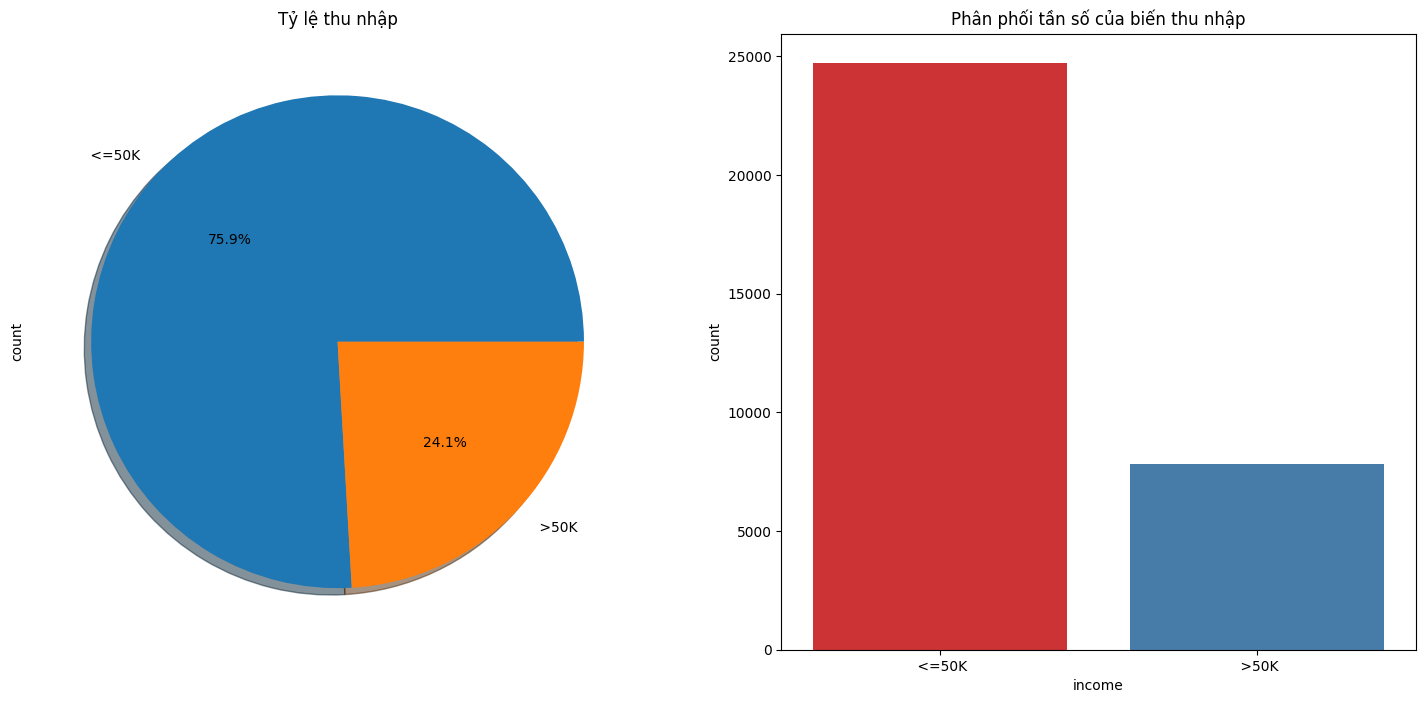

In [13]:
# Trực quan hóa phân phối biến income
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0] = df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Tỷ lệ thu nhập')

ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Phân phối tần số của biến thu nhập")
plt.show()


C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_16564\1220963564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(' ?', np.nan, inplace=True)


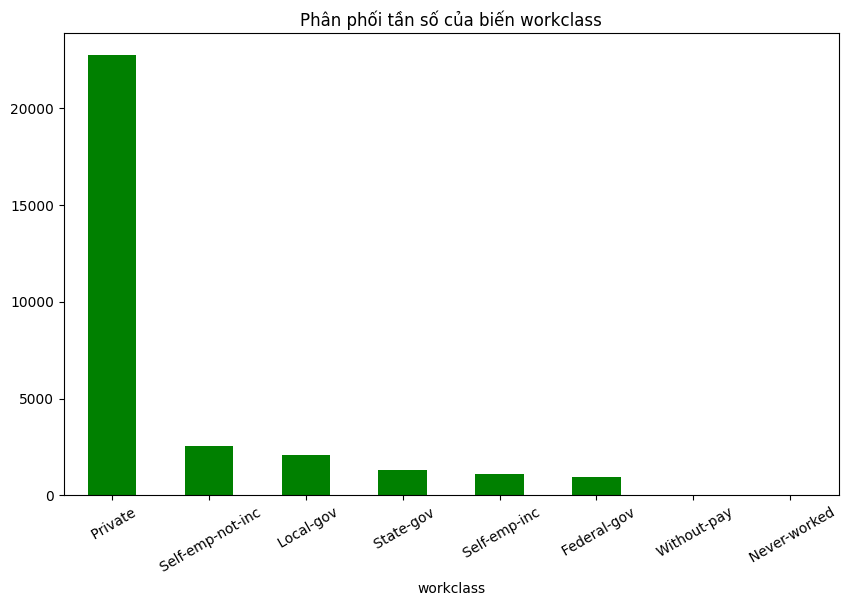

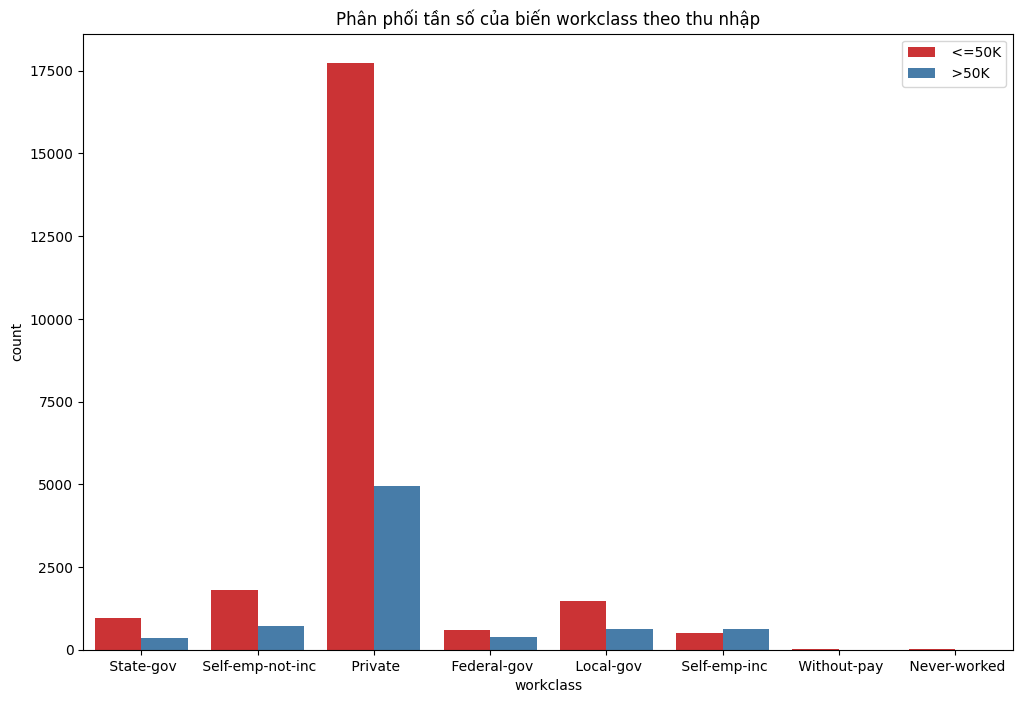

In [14]:
# Phân tích biến workclass
df['workclass'].replace(' ?', np.nan, inplace=True)

f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Phân phối tần số của biến workclass")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

# Phân tích income theo workclass
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Phân phối tần số của biến workclass theo thu nhập")
ax.legend(loc='upper right')
plt.show()


Có 6 biến số liệu

Các biến số liệu là:

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_16564\2209210672.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], bins=10, color='blue')


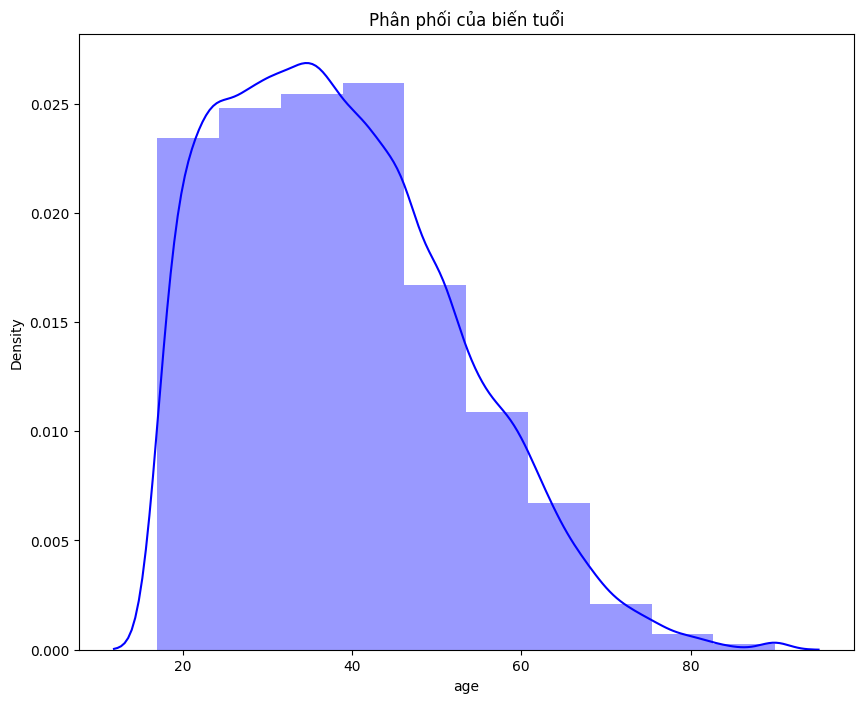

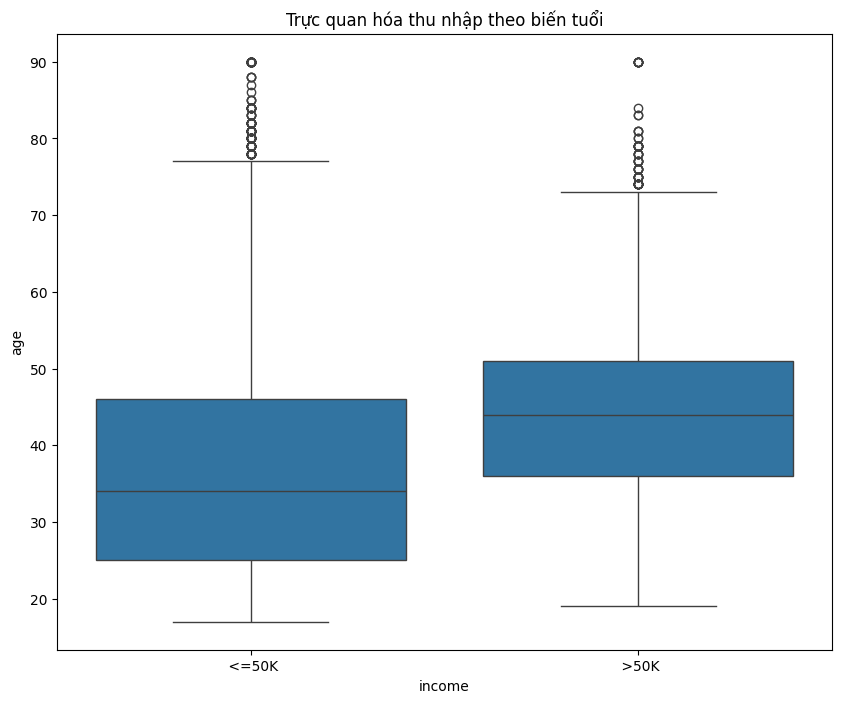

In [15]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('Có {} biến số liệu\n'.format(len(numerical)))
print('Các biến số liệu là:\n\n', numerical)

# Trực quan hóa biến age
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df['age'], bins=10, color='blue')
ax.set_title("Phân phối của biến tuổi")
plt.show()

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Trực quan hóa thu nhập theo biến tuổi")
plt.show()


In [16]:

# Tách dữ liệu
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Xử lý biến phân loại
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
X_train[categorical].isnull().mean()

# Import category encoders và mã hóa biến phân loại
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)





In [17]:
# Chuẩn hóa dữ liệu
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


Độ chính xác của mô hình với 10 cây quyết định : 0.8544
Độ chính xác của mô hình với 100 cây quyết định : 0.8544


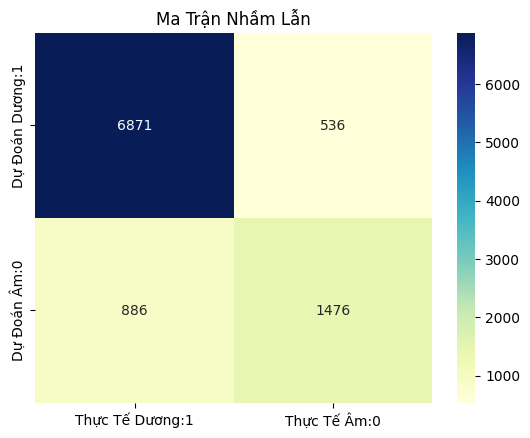

In [18]:
# Khởi tạo mô hình Random Forest
rfc = RandomForestClassifier(random_state=0)

# Huấn luyện mô hình
rfc.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rfc.predict(X_test)

# Kiểm tra độ chính xác
print('Độ chính xác của mô hình với 10 cây quyết định : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Sử dụng 100 cây quyết định
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

# Kiểm tra độ chính xác
print('Độ chính xác của mô hình với 100 cây quyết định : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Thực Tế Dương:1', 'Thực Tế Âm:0'],
                                 index=['Dự Đoán Dương:1', 'Dự Đoán Âm:0'])

# Trực quan hóa ma trận nhầm lẫn
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ma Trận Nhầm Lẫn')
plt.show()


In [20]:

import pickle

# Lưu mô hình vào file 'model.pkl'
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc_100, file)  

The shape of the dataset :  (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Số lượng giá trị thiếu trong mỗi cột:
age            

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11456\1676437088.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(' ?', np.nan, inplace=True)
C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11456\1676437088.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Độ chính xác của mô hình với 10 cây quyết định : 0.8524
Độ chính xác của mô hình với 100 cây quyết định : 0.8524


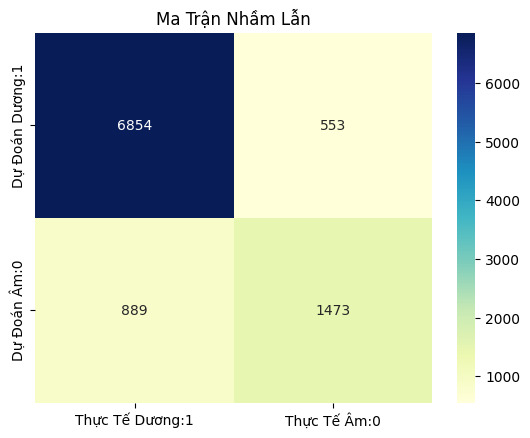

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Đảm bảo hiển thị đồ thị trong notebook
%matplotlib inline

data = 'income_evaluation.csv'
df = pd.read_csv(data)

# Kiểm tra kích thước của tập dữ liệu
print('The shape of the dataset : ', df.shape)
df.head()

# Đặt tên cột
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']
df.columns = col_names

# Thông tin chung về dữ liệu
df.info()
df.describe(include='all')

# Kiểm tra giá trị thiếu
print('Số lượng giá trị thiếu trong mỗi cột:')
print(df.isnull().sum())

# Hàm EDA ban đầu
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Kích thước : %d hàng, %d cột" % (df.shape[0], df.shape[1]))
        print("Tổng số giá trị NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Tên Cột", "Kiểu Dữ Liệu", "#Duy Nhất", "Giá Trị NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Kỳ vọng một DataFrame nhưng nhận được một %15s" % (type(df)))

initial_eda(df)

# Liệt kê các biến phân loại
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Có {} biến phân loại\n'.format(len(categorical)))
print('Các biến phân loại là:\n\n', categorical)

# Kiểm tra giá trị và tỷ lệ của từng biến phân loại
for var in categorical:
    print(df[var].value_counts())
    print(df[var].value_counts() / float(len(df)))

# Loại bỏ khoảng trắng thừa trước/sau tên cột
df.columns = df.columns.str.strip()
print(df['income'].value_counts())

# Trực quan hóa phân phối biến income
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0] = df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Tỷ lệ thu nhập')

ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Phân phối tần số của biến thu nhập")
plt.show()

# Phân tích biến workclass
df['workclass'].replace(' ?', np.nan, inplace=True)

f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Phân phối tần số của biến workclass")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

# Phân tích income theo workclass
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Phân phối tần số của biến workclass theo thu nhập")
ax.legend(loc='upper right')
plt.show()

numerical = [var for var in df.columns if df[var].dtype != 'O']
print('Có {} biến số liệu\n'.format(len(numerical)))
print('Các biến số liệu là:\n\n', numerical)

# Trực quan hóa biến age
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df['age'], bins=10, color='blue')
ax.set_title("Phân phối của biến tuổi")
plt.show()

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Trực quan hóa thu nhập theo biến tuổi")
plt.show()

# Tách dữ liệu
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Xử lý biến phân loại
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
X_train[categorical].isnull().mean()

# Sử dụng OneHotEncoder từ sklearn để mã hóa biến phân loại
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])

# Chuyển đổi lại thành DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical))

# Kết hợp lại với các biến số liệu
X_train = pd.concat([X_train.drop(categorical, axis=1).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical, axis=1).reset_index(drop=True), X_test_encoded], axis=1)

# Chuẩn hóa dữ liệu
scaler = RobustScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# Khởi tạo mô hình Random Forest
rfc = RandomForestClassifier(random_state=0)

# Huấn luyện mô hình
rfc.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rfc.predict(X_test)

# Kiểm tra độ chính xác
print('Độ chính xác của mô hình với 10 cây quyết định : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Sử dụng 100 cây quyết định
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

# Kiểm tra độ chính xác
print('Độ chính xác của mô hình với 100 cây quyết định : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Thực Tế Dương:1', 'Thực Tế Âm:0'],
                         index=['Dự Đoán Dương:1', 'Dự Đoán Âm:0'])

# Trực quan hóa ma trận nhầm lẫn
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ma Trận Nhầm Lẫn')
plt.show()

import pickle

# Lưu mô hình vào file 'model.pkl'
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc_100, file)


The shape of the dataset :  (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Số lượng giá trị thiếu trong mỗi cột:
age            

C:\Users\PHAN DUC TAI\AppData\Local\Temp\ipykernel_11456\1901202497.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


Độ chính xác của mô hình: 0.8431


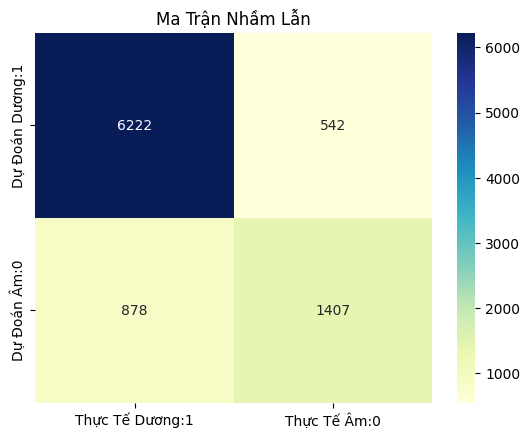

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Đảm bảo hiển thị đồ thị trong notebook
%matplotlib inline

# Đọc dữ liệu từ file CSV
data = 'income_evaluation.csv'
df = pd.read_csv(data)

# Kiểm tra kích thước của tập dữ liệu
print('The shape of the dataset : ', df.shape)
df.head()

# Đặt tên cột
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']
df.columns = col_names

# Thông tin chung về dữ liệu
df.info()
df.describe(include='all')

# Kiểm tra giá trị thiếu
print('Số lượng giá trị thiếu trong mỗi cột:')
print(df.isnull().sum())

# Hàm EDA ban đầu
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Kích thước : %d hàng, %d cột" % (df.shape[0], df.shape[1]))
        print("Tổng số giá trị NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Tên Cột", "Kiểu Dữ Liệu", "#Duy Nhất", "Giá Trị NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Kỳ vọng một DataFrame nhưng nhận được một %15s" % (type(df)))

initial_eda(df)

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

# Xử lý giá trị '?' thành NaN
df.replace(' ?', np.nan, inplace=True)

# Xóa các hàng có giá trị NaN
df.dropna(inplace=True)

# Tách dữ liệu
X = df.drop(['income'], axis=1)
y = df['income']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Phát hiện các biến phân loại
categorical = [col for col in X_train.columns if X_train[col].dtype == 'O']

# Sử dụng OneHotEncoder để mã hóa biến phân loại
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])

# Chuyển đổi lại thành DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical))

# Kết hợp lại với các biến số liệu
X_train = pd.concat([X_train.drop(categorical, axis=1).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical, axis=1).reset_index(drop=True), X_test_encoded], axis=1)

# Chuẩn hóa dữ liệu
numerical = [var for var in X_train.columns if X_train[var].dtype in [np.int64, np.float64]]
scaler = RobustScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# Khởi tạo mô hình Random Forest
rfc = RandomForestClassifier(random_state=0)

# Huấn luyện mô hình
rfc.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rfc.predict(X_test)

# Kiểm tra độ chính xác
print('Độ chính xác của mô hình: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Thực Tế Dương:1', 'Thực Tế Âm:0'],
                         index=['Dự Đoán Dương:1', 'Dự Đoán Âm:0'])

# Trực quan hóa ma trận nhầm lẫn
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ma Trận Nhầm Lẫn')
plt.show()

import pickle

# Lưu mô hình vào file 'random_forest_model.pkl'
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Giả sử bạn đã có X_train và y_train

# Huấn luyện mô hình
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Lưu mô hình
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Lưu tên các cột đã được mã hóa
encoded_columns = X_train.columns.tolist()
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)
